# DEEP LEARNING NOTES


### Chapter-10: ISLR (2nd Edition)

- The cornerstone of **Deep Learning** is the `neural network`.


- Initially, neuaral networks rose to fame in 1980s. But other algorithms like SVMs, boosting, and random forests outperformed Neural Networks.


- After 2010, Neural Networks again resurfaced with the new name: `Deep Learning`

- Main topics covered in this chapter:-
> - Single Layer Neural Networks
> - Multilayer Neural Networks

# Single Layer Neural Networks

### Main Function of a Neural Network

- A neural network takes an input vector of $p$ variables

$X = (X_1, X_2, ......, X_p)$

and builds a nonlinear function $f(X)$ to predict the response $Y$.

### Simple Feedforward Neural Network

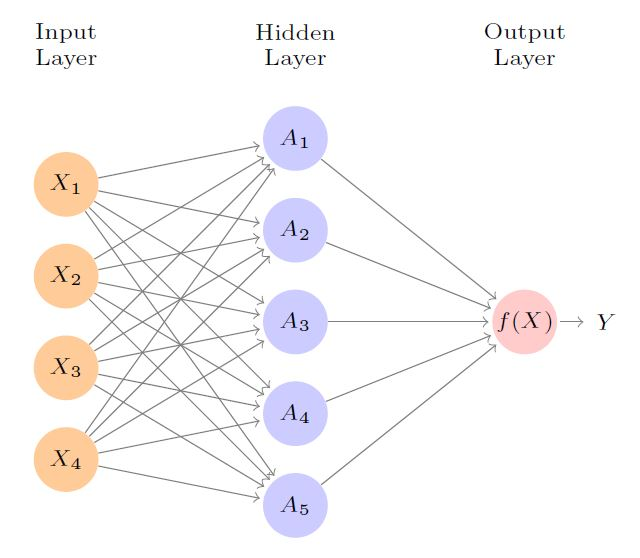

- Above figure shows a simple feed-forward neural network for modeling a quantitative response (i.e. regression problem) using $p = 4$ predictors.

- The four features $X_1$, $X_2$, $X_3$ and $X_4$ make up the units in the **input layer**.

- The arrows indicate that each of the inputs from the input layer feeds into each of the **K** hidden layers (here we have taken K=5).

- The neural network model is of the form:-

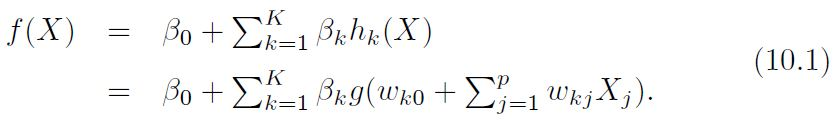

This model is built in two steps:

1. First, the **K** activations $A_k, k = 1,2,....,K$ in the hidden layer are computed as functions of the input features $X_1, X_2, ...., X_p$

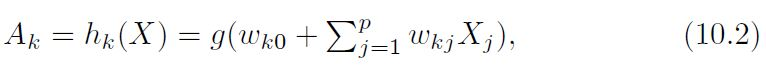

where $g(z)$ is a **nonlinear activation function** that is specified in advance.

- We can think of $A_k$ as a different transformation $h_k(X)$ of the original features.

2. These **K** activations from the hidden layer then feed into the output layer, resulting in a linear model as below:

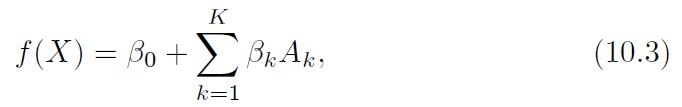

- Here, all the parameters $ß_0, ...., ß_K$ and $w_{10}, ...., w_{Kp}$ need to be estimated from data.

### Activation Functions

**Sigmoid function**

- It was favored in early instances of neural networks.
- It is the same function used in Logistic Regression to convert a linear function into probabilities bwtween zero and one.

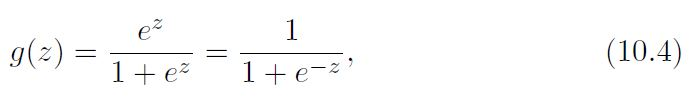

#### ReLU (Rectified Linear Unit) function

- It is the preferred choice in modern neural networks.
- A ReLU activation can be computed and stored more efficiently than a sigmoid activation.

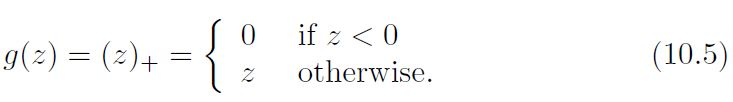

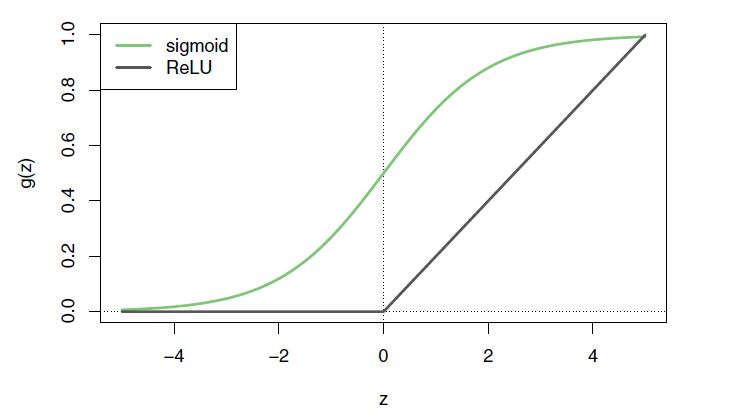

### Summary of Feedforward Neural Network

- This model derives five new features by computing five different linear combinations of X, and then squashes each through an activation function $g(.)$ to transform it.
- Thus, the final model is linear in these derived variables.

### Analogy to Brain

- The hidden units in neural networks are analogous to neurons in the brain
- Values of activations $A_k = h_k(X)$ close to one are ***firing***, while those close to zero are ***silent*** (in case of sigmoid activation function)

### Significance of Activation Function

- Without the nonlinearity in the activation function $g(.)$, the model $f(X)$ of equation 10.1 would collapse into a simple linear model in $X_1,.....,X_p$.
- Also, having a nonlinear activation function allows the model to capture ***complex nonlinearities*** and ***interaction effects***.

### Fitting a Neural Network

- Fitting a neural network requires estimating the unknown parameters in equation 10.1.
- For a **quantitative response** (i.e. regression problem), a **squared-error loss** is used. So, the parameters are chosen to minimize

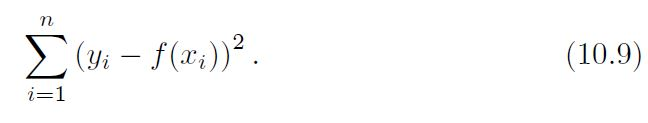

- For a **qualitative response** (i.e. classification problem), **log liklihood** or **cross entropy** is used.

# Multilayer Neural Networks

- Theoretically, a single hidden layer with a large number of units has the ability to approximate most functions.
- However, the learning task of discovering a good solution is made much easier with multiple layers each of modest size.

### Example: MNIST Digits Classification (Multinomial)

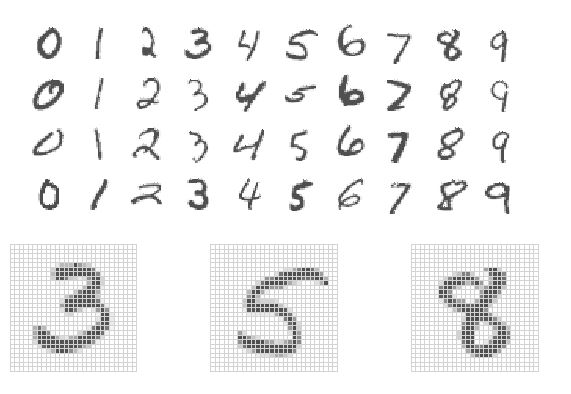

- Our goal is: to build a model to classify the images into their correct digit class 0-9.
- Every image has $p = 28 X 28 = 784$ pixels, each of which is an 8-bit greyscale value between 0 and 255 representing the relative amount of the written digit in that tiny square.

- **Input vector X** stores the pixels.
- **Output Y** is the class label represented by a vector $Y = (Y_0, Y_1,....,Y_9)$ of 10 dummy variables (1 => position corresponding to the label, and 0 => elsewhere). This is called **one-hot encoding**.

<br>

- There are $60,000$ training images and $10,000$ test images.
- Below figure shows a multilayer neural network architecture that works well in this case

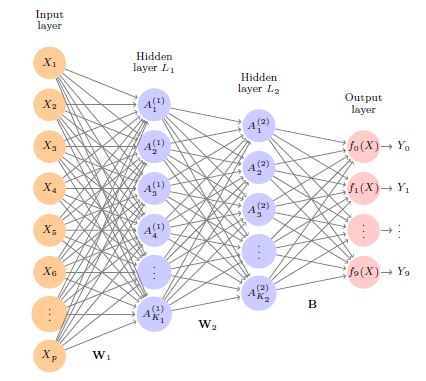

#### Differences between this network and the earlier one (with only one hidden layer)

> - It has two hidden layers: $L_1$ (25 units) and $L_2$ (128 units) rather than one.
> - It has ten output variables rather than one.
> - The loss function used for training the network is tailored for the multiclass classification task.

#### In multi-task learning, one can predict different responses simultaneously with a single network; they all have a say in the formation of the hidden layers.

- `First Hidden layer` is given by 

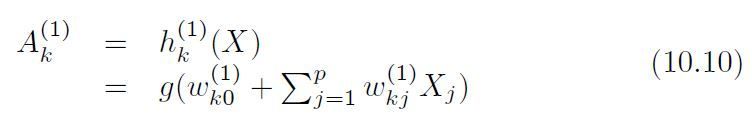

for $k = 1,....,K_1$

- `Second Hidden layer` is given by

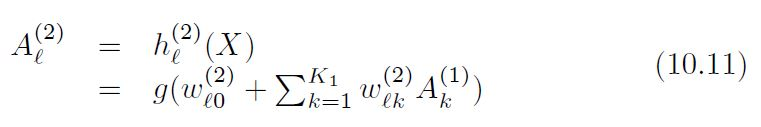

for $l = 1,....,K_2$

- Each of the activations in the second layer is a function of input vector $X$.
- While they are explicitly a functions of activations from layer $L_1$, these in turn are functions of X.

<br>

#### Through a chain of transformations, the network is able to buld up fairly complex transformations of $X$ that ultimately feed into the output layer as features.

- $W_1$ represents entire matrix of weights that feed from the input layer to the first hidden layer $L_1$. This matrix will have $785 X 256 = 200,960$ elements

(Note: 785 instead of 784 because we must account for the intercept or bias term)

- Each element $A_k^{(1)}$ feeds to the second hidden layer $L_2$ via the weight matrix $W_2$ of dimension $257 X 128 = 32,896$

- In output layer, we first compute ten different linear models similar to our single model of equation 10.1

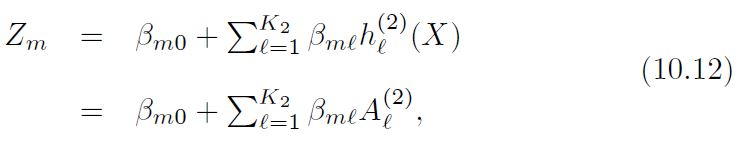

for $m = 0,1,.....,9$

- The matrix $B$ stores all $129 X 10 = 1290$ of these weights.

- Now, we want our estimates to represent class probabilities $f_m(X) = Pr(Y = m|X)$, similar to multinomial logistic regression.

- So, we use the **softmax** activation function

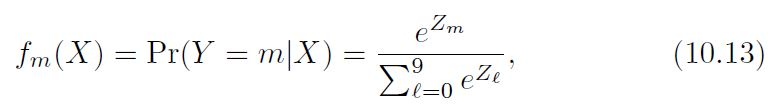

for $m = 0,1,....,9$. 
- This ensures that the 10 numbers behave like probabilities, i.e. **non-negative** and **sum to one**.

<br>

- Our model estimates a probability for each of the 10 classes.
- The classifier then assigns the image to the class with the highest probability.

#### Training this network

- We look for coefficient estimates that minimize the negative multinomial log-likelihood or cross entropy:

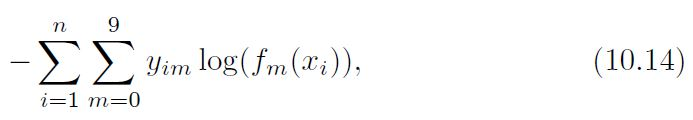

- Below table compares test performance of the neural network with two simple models that make use of linear decision boundaries: `multinomial logistic regression` and `linear discriminant analysis`.
- We observe a dramatic improvement when we use neural networks.

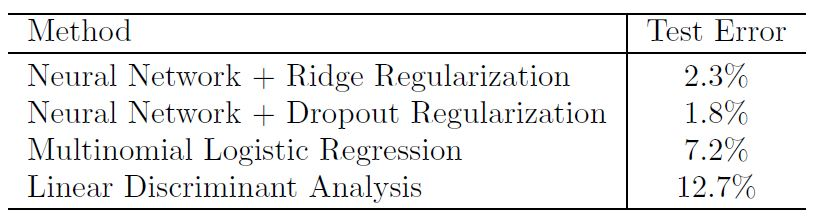

#### Need for regularization


- Adding number of coefficients in $W_1, W_2 and B$, we get 235,146 (which is more than 33 times the number $785 X 9 = 7,065$ needed for multinomial logistic regression.
- We have $60,000$ images in the training data and there are almost four times as many coefficients in the neural network model as there are observations in the training data.
- Thus, to avoid overfitting, some kind of regularization is needed (above table uses two such types).